In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [6]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from sklearn.preprocessing import LabelBinarizer

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [3]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        # Your code starts here
        images = []
        labels = []
        reader = csv.reader(training_file)
        next(reader)
        for row in reader:
            labels.append(np.array(row[0]))
            images.append(np.array_split(row[1:785], 28))
        labels = np.array(labels).astype('float32')
        images = np.array(images).astype('float32')
        # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [8]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims


training_images = training_images.reshape(-1, 28, 28, 1)
testing_images = testing_images.reshape(-1, 28, 28, 1)

label_binarizer = LabelBinarizer()
training_labels = label_binarizer.fit_transform(training_labels)
testing_labels = label_binarizer.fit_transform(testing_labels)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.0,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=False,
                                   fill_mode='nearest')

train_datagen.fit(training_images)

validation_datagen = ImageDataGenerator(rescale = 1./255.0)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [11]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')]
    )

# Compile Model. 
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# Train the Model
history = model.fit(train_datagen.flow(training_images,training_labels, batch_size = 128) ,
                    epochs = 20, 
                    validation_data = (testing_images, testing_labels))

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/20
215/215 [==============================] - 44s 204ms/step - loss: 1.8638 - accuracy: 0.4434 - val_loss: 79.7250 - val_accuracy: 0.7008
Epoch 2/20
215/215 [==============================] - 44s 203ms/step - loss: 0.7201 - accuracy: 0.7716 - val_loss: 29.6779 - val_accuracy: 0.8797
Epoch 3/20
215/215 [==============================] - 44s 204ms/step - loss: 0.4068 - accuracy: 0.8707 - val_loss: 17.3592 - val_accuracy: 0.9265
Epoch 4/20
215/215 [==============================] - 44s 203ms/step - loss: 0.2833 - accuracy: 0.9087 - val_loss: 12.0815 - val_accuracy: 0.9472
Epoch 5/20
215/215 [==============================] - 44s 203ms/step - loss: 0.2155 - accuracy: 0.9298 - val_loss: 6.2586 - val_accuracy: 0.9711
Epoch 6/20
215/215 [==============================] - 44s 203ms/step - loss: 0.1616 - accuracy: 0.9491 - val_loss: 13.1184 - val_accuracy: 0.9562
Epoch 7/20
215/215 [==============================] - 44s 204ms/step - loss: 0.1312 - accuracy: 0.9588 - val_loss: 6.3586 - v

[6.92426086682151, 0.56609035]

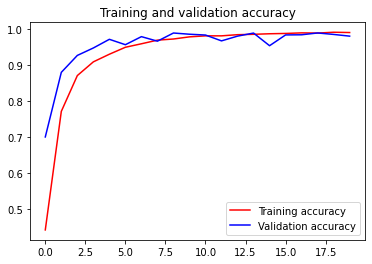

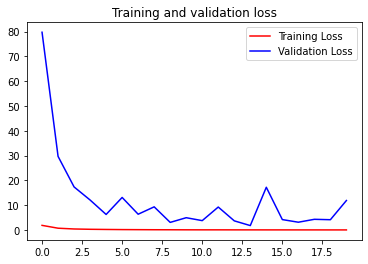

In [13]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()